# Extract information from RBC-GEM

Purpose of this notebook is to extract RBC-GEM annotation data and format as a tab-delimited (TSV) file.

## Setup
### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from rbc_gem_utils import (
    COBRA_CONFIGURATION,
    ROOT_PATH,
    MODEL_PATH,
    INTERIM_PATH,
    read_rbc_model,
    show_versions,
    get_annotation_df,
    compare_tables,
    visualize_comparison,
    split_string,
    explode_column,
)

from rbc_gem_utils.annotation import set_sbo_default_annotations

# Display versions of last time notebook ran and worked
show_versions()


Package Information
-------------------
rbc-gem-utils 0.0.1

Dependency Information
----------------------
beautifulsoup4                       4.12.3
bio                                   1.6.2
cobra                                0.29.0
depinfo                               2.2.0
kaleido                               0.2.1
matplotlib                            3.8.2
memote                               0.17.0
networkx                              3.2.1
notebook                              7.0.7
openpyxl                              3.1.2
pandas                                2.2.0
pre-commit                            3.6.0
pyvis                                 0.3.2
rbc-gem-utils[database,network,vis] missing
requests                             2.31.0
scipy                                1.12.0
seaborn                              0.13.2

Build Tools Information
-----------------------
pip        23.3.1
setuptools 68.2.2
wheel      0.41.2

Platform Information
-------------------

### Define configuration
#### COBRA Configuration

In [2]:
COBRA_CONFIGURATION

Attribute,Description,Value
solver,Mathematical optimization solver,gurobi
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,15
cache_directory,Path for the model cache,/Users/zhaiman/Library/Caches/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


## Load RBC-GEM model

In [3]:
model = read_rbc_model(filetype="xml")
model.reactions.sort()
model.genes.sort()
model.metabolites.sort()
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-28


Name,RBC_GEM
Memory address,14b9e3e50
Number of metabolites,2057
Number of reactions,3030
Number of genes,779
Number of groups,78
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


## Extract annotations from model

In [4]:
compare_figsize = (10, 5)
compare = True
display_nunique = True
overwrite = True
reset_sbo = True  # Using this option resets the model SBO terms to default values before exporting the sheet. Also occurs when reset_all is True, regardless of this value..

In [5]:
if reset_sbo:
    # Reset SBO annotations
    set_sbo_default_annotations(
        model, ["reactions", "metabolites", "genes"], verbose=False
    )

### Reactions

reactions: 3030
bigg.reaction: 3495
biocyc: 188
ec-code: 389
kegg.reaction: 524
metanetx.reaction: 1156
metatlas: 1559
reactome: 243
references: 931
rhea: 508
sabiork.reaction: 149
sbo: 3
seed.reaction: 288
spontaneous: 4
tcdb: 31
vmhreaction: 1588


,reactions,bigg.reaction,biocyc,ec-code,kegg.reaction,metanetx.reaction,metatlas,reactome,references,rhea,sabiork.reaction,sbo,seed.reaction,spontaneous,tcdb,vmhreaction
0,13DAMPPOX,13DAMPPOX,<NA>,1.4.3.6;1.4.3.21;1.4.3.22,<NA>,MNXR94687,MAR07992,<NA>,pubmed:23330127,<NA>,<NA>,SBO:0000176,<NA>,0.0,<NA>,13DAMPPOX
1,15KPGE1Ry,15KPGE1Ry,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,pubmed:236730;pubmed:24657656;pubmed:6597453;p...,<NA>,<NA>,SBO:0000176,<NA>,0.0,<NA>,<NA>
2,15KPGE2Ry,15KPGE2Ry,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,pubmed:236730;pubmed:24657656;pubmed:6597453;p...,<NA>,<NA>,SBO:0000176,<NA>,0.0,<NA>,<NA>
3,15KPGE3Ry,15KPGE3Ry,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,pubmed:236730;pubmed:24657656;pubmed:6597453;p...,<NA>,<NA>,SBO:0000176,<NA>,0.0,<NA>,<NA>
4,15KPGF1Ry,15KPGF1Ry,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,pubmed:236730;pubmed:24657656;pubmed:6597453;p...,<NA>,<NA>,SBO:0000176,<NA>,0.0,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,YYYTPAP,YYYTPAP,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,pubmed:6058286;pubmed:7002549,<NA>,<NA>,SBO:0000176,<NA>,0.0,<NA>,<NA>
3026,ZN2Htex2,ZN2Htex2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,pubmed:11817695;pubmed:18936201;pubmed:2245666...,<NA>,<NA>,SBO:0000185,<NA>,0.0,<NA>,<NA>
3027,ZN2_2HCO3t,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,pubmed:22456662;pubmed:22898811;pubmed:2484233...,<NA>,<NA>,SBO:0000185,<NA>,0.0,<NA>,<NA>
3028,ZN2_HCO3_SELNIt,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,pubmed:22456662;pubmed:22898811;pubmed:2716625...,<NA>,<NA>,SBO:0000185,<NA>,0.0,<NA>,<NA>


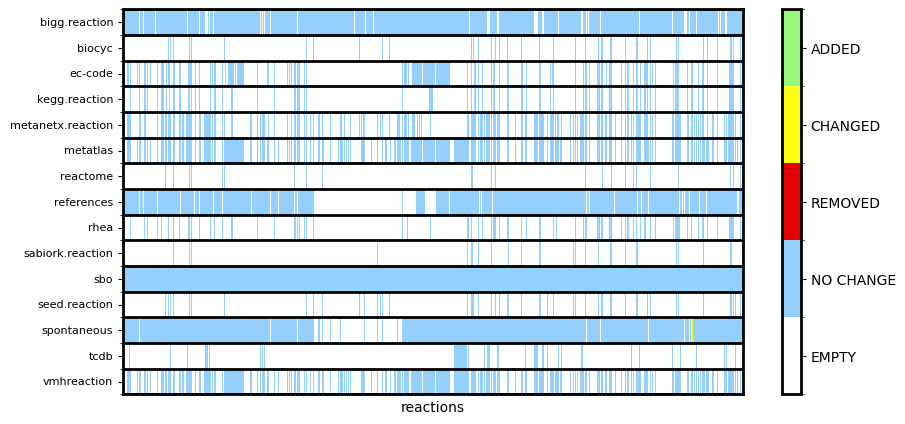

In [6]:
annotation_type = "reactions"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))
# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), sorted(list(all_annotation_keys))
).rename({"id": annotation_type}, axis=1)


df_annotations = df_annotations.replace(float("nan"), pd.NA).replace("", pd.NA)
if compare:
    compare_on_index = [annotation_type]
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", sep="\t", index_col=None
        )
        df_previous = df_previous.replace(float("nan"), pd.NA).replace("", pd.NA)
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=compare_on_index)
    df_comparision = compare_tables(
        df_previous.set_index(compare_on_index),
        df_annotations.set_index(compare_on_index),
    )

    fig, ax = plt.subplots(1, 1, figsize=compare_figsize)
    ax.yaxis.set_tick_params(labelsize=8)
    ax = visualize_comparison(df_comparision)

if display_nunique:
    for col in df_annotations.columns:
        df = explode_column(df_annotations, name=col, sep=";")
        df = df[col].drop_duplicates()
        print(f"{df.name}: {df.nunique()}")

if overwrite:
    df_annotations.to_csv(
        f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", sep="\t", index=False
    )
else:
    df_annotations.to_csv(
        f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t", index=False
    )
df_annotations

### Metabolites

metabolites: 2057
bigg.metabolite: 1571
biocyc: 212
chebi: 710
envipath: 72
hmdb: 501
inchikey: 184
kegg.compound: 767
kegg.drug: 64
kegg.glycan: 6
lipidmaps: 227
metanetx.chemical: 1173
metatlas: 1450
pubchem.compound: 676
reactome: 455
sabiork.compound: 218
sbo: 1
seed.compound: 224
slm: 7
vmhmetabolite: 1144


,metabolites,bigg.metabolite,biocyc,chebi,envipath,hmdb,inchikey,kegg.compound,kegg.drug,kegg.glycan,lipidmaps,metanetx.chemical,metatlas,pubchem.compound,reactome,sabiork.compound,sbo,seed.compound,slm,vmhmetabolite
0,10fthf_c,10fthf,<NA>,CHEBI:15637,<NA>,<NA>,<NA>,C00234,<NA>,<NA>,<NA>,MNXM237,MAM00266c,122347.0,<NA>,<NA>,SBO:0000247,<NA>,<NA>,10fthf
1,12ppd__R_c,12ppd__R,<NA>,CHEBI:16997,<NA>,HMDB0001881,<NA>,C00583,<NA>,<NA>,<NA>,MNXM1118;MNXM1255;MNXM90191,MAM02771c,1030.0,<NA>,<NA>,SBO:0000247,<NA>,<NA>,12ppd_R
2,12ppd__S_c,12ppd__S,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,SBO:0000247,<NA>,<NA>,<NA>
3,13dampp_c,13dampp,<NA>,CHEBI:15725,<NA>,HMDB0000002,<NA>,C00986,<NA>,<NA>,<NA>,MNXM146468;MNXM350,MAM00248c,428.0,<NA>,<NA>,SBO:0000247,<NA>,<NA>,13dampp
4,13dpg_c,13dpg,META:DPG,CHEBI:16001,<NA>,HMDB62758,LJQLQCAXBUHEAZ-UWTATZPHSA-J,C00236,<NA>,<NA>,<NA>,MNXM261,MAM00247c,439191.0,29800,21215,SBO:0000247,cpd00203,<NA>,13dpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,zn2_c,zn2,<NA>,CHEBI:29105,<NA>,HMDB0015532,<NA>,C00038,<NA>,<NA>,<NA>,MNXM149,MAM03157c,32051.0,<NA>,<NA>,SBO:0000247,<NA>,<NA>,zn2
2053,zn2_e,zn2,<NA>,CHEBI:29105,<NA>,HMDB0015532,<NA>,C00038,<NA>,<NA>,<NA>,MNXM149,MAM03157e,32051.0,<NA>,<NA>,SBO:0000247,<NA>,<NA>,zn2
2054,ztp_c,ztp,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,SBO:0000247,<NA>,<NA>,<NA>
2055,zymst_c,zymst,<NA>,CHEBI:18252,<NA>,<NA>,<NA>,C05437,<NA>,<NA>,LMST01010066,MNXM574,MAM03158c,92746.0,<NA>,<NA>,SBO:0000247,<NA>,<NA>,zymst


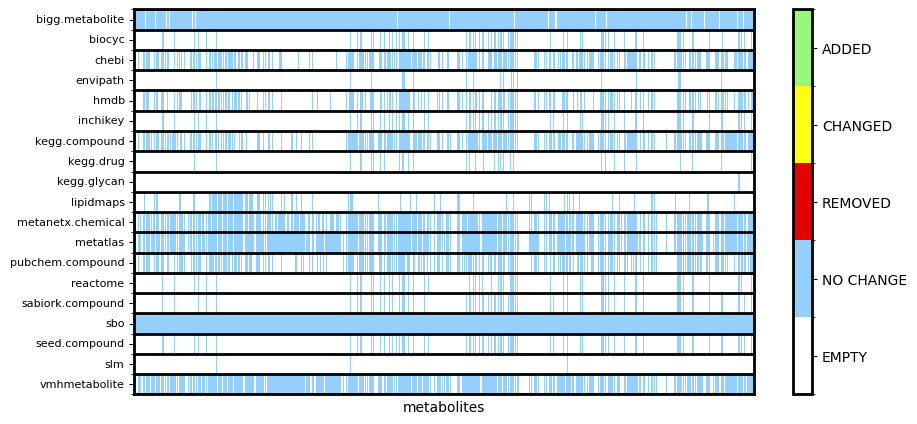

In [7]:
annotation_type = "metabolites"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))
# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), sorted(list(all_annotation_keys))
).rename({"id": annotation_type}, axis=1)

df_annotations = df_annotations.replace(float("nan"), pd.NA).replace("", pd.NA)
if compare:
    compare_on_index = [annotation_type]
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", sep="\t", index_col=None
        )
        df_previous = df_previous.replace(float("nan"), pd.NA).replace("", pd.NA)
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=compare_on_index)
    df_comparision = compare_tables(
        df_previous.set_index(compare_on_index),
        df_annotations.set_index(compare_on_index),
    )

    fig, ax = plt.subplots(1, 1, figsize=compare_figsize)
    ax.yaxis.set_tick_params(labelsize=8)
    ax = visualize_comparison(df_comparision)

if display_nunique:
    for col in df_annotations.columns:
        df = explode_column(df_annotations, name=col, sep=";")
        df = df[col].drop_duplicates()
        print(f"{df.name}: {df.nunique()}")

if overwrite:
    df_annotations.to_csv(
        f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", sep="\t", index=False
    )
else:
    df_annotations.to_csv(
        f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t", index=False
    )
df_annotations

### Genes

genes: 779
bgee.gene: 778
biocyc: 285
biogrid: 781
bmrb: 88
brenda: 395
cazy: 18
ccds: 1348
cdd: 620
chebi: 9
chembl.target: 504
chromosome: 25
complexportal: 360
dbsnp: 4682
dip: 243
disprot: 43
drugbank: 2303
drugcentral: 662
ec-code: 510
eco: 5
efo: 10
eggnog: 590
ena.embl: 8027
ensembl: 524
genecards: 780
genetree: 713
genewiki: 594
go: 5735
hamap: 89
hgnc: 780
hgnc.symbol: 780
hogenom: 565
hpa: 778
hprd: 91
ideal: 41
intact: 771
interpro: 1899
iuphar.receptor: 169
kegg.genes: 783
merops: 38
mgi: 752
mim: 1243
mondo: 32
ncbigene: 784
ncbigi: 108
nextprot: 779
oma.grp: 745
orphanet: 521
orthodb: 555
panther.family: 1314
pdb: 11271
peroxibase: 11
pfam: 722
pharmgkb.gene: 774
pirsf: 148
prints: 193
prosite: 398
proteomicsdb.protein: 1673
pubchem.compound: 1167
pubmed: 368
reactome: 1035
references: 641
refseq: 2342
rhea: 1418
sasbdb: 38
sbo: 1
smart: 181
smpdb: 646
smr: 762
supfam: 317
taxonomy: 1
tcdb: 143
treefam: 594
uniparc: 779
uniprot: 779
uniprot.chain: 825
uniprot.isoform: 153

,genes,bgee.gene,biocyc,biogrid,bmrb,brenda,cazy,ccds,cdd,chebi,...,smpdb,smr,supfam,taxonomy,tcdb,treefam,uniparc,uniprot,uniprot.chain,uniprot.isoform
0,A4GALT,ENSG00000128274,MetaCyc:HS05171-MONOMER,119825,<NA>,2.4.1.228,GT32,CCDS14041.1,<NA>,<NA>,...,<NA>,<NA>,SSF53448,9606,<NA>,TF324053,UPI000003FF92,Q9NPC4,PRO_0000080578,<NA>
1,AARS1,ENSG00000090861,<NA>,106534,<NA>,<NA>,<NA>,CCDS32474.1,cd00673,<NA>,...,SMP0000055;SMP0000313;SMP0000350;SMP0000352,P49588,SSF55681;SSF101353;SSF55186;SSF50447,9606,<NA>,TF300737,UPI0000169F0B,P49588,PRO_0000075281,P49588-1;P49588-2
2,AASDHPPT,ENSG00000149313,MetaCyc:HS14278-MONOMER,121927,<NA>,2.7.8.7,<NA>,CCDS31664.1,<NA>,<NA>,...,<NA>,Q9NRN7,SSF56214,9606,<NA>,TF313753,UPI0000034CAD,Q9NRN7,PRO_0000175736,Q9NRN7-1;Q9NRN7-2
3,ABCA1,ENSG00000165029,<NA>,106537,<NA>,<NA>,<NA>,CCDS6762.1,cd03263,<NA>,...,<NA>,O95477,SSF52540,9606,3.A.1.211.14,TF105191,UPI000013E441,O95477,PRO_0000093288,<NA>
4,ABCA7,ENSG00000064687,<NA>,115629,<NA>,<NA>,<NA>,CCDS12055.1,cd03263,<NA>,...,<NA>,Q8IZY2,SSF52540,9606,3.A.1.211.10,TF105191,UPI000013D3A4,Q8IZY2,PRO_0000250674,Q8IZY2-1;Q8IZY2-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,YES1,ENSG00000176105,<NA>,113357,<NA>,2.7.10.2,<NA>,CCDS11824.1,cd05069;cd09933;cd12007,<NA>,...,<NA>,P07947,SSF56112;SSF55550;SSF50044,9606,<NA>,TF351634,UPI0000062316,P07947,PRO_0000088181,<NA>
775,ZDHHC2,ENSG00000104219,<NA>,119374,<NA>,2.3.1.225,<NA>,CCDS47810.1,<NA>,<NA>,...,<NA>,Q9UIJ5,<NA>,9606,<NA>,TF316044,UPI000004A02F,Q9UIJ5,PRO_0000212859,<NA>
776,ZDHHC20,ENSG00000180776,<NA>,128991,<NA>,<NA>,<NA>,CCDS45017.1;CCDS81758.1,<NA>,<NA>,...,<NA>,Q5W0Z9,<NA>,9606,8.A.114.1.6,TF316044,UPI000045881B,Q5W0Z9,PRO_0000212906,Q5W0Z9-1;Q5W0Z9-2;Q5W0Z9-3;Q5W0Z9-4
777,ZDHHC3,ENSG00000163812,<NA>,119455,<NA>,2.3.1.225,<NA>,CCDS2724.1;CCDS46811.1,<NA>,<NA>,...,<NA>,Q9NYG2,<NA>,9606,<NA>,TF319798,UPI000002B749,Q9NYG2,PRO_0000422064,Q9NYG2-1;Q9NYG2-2


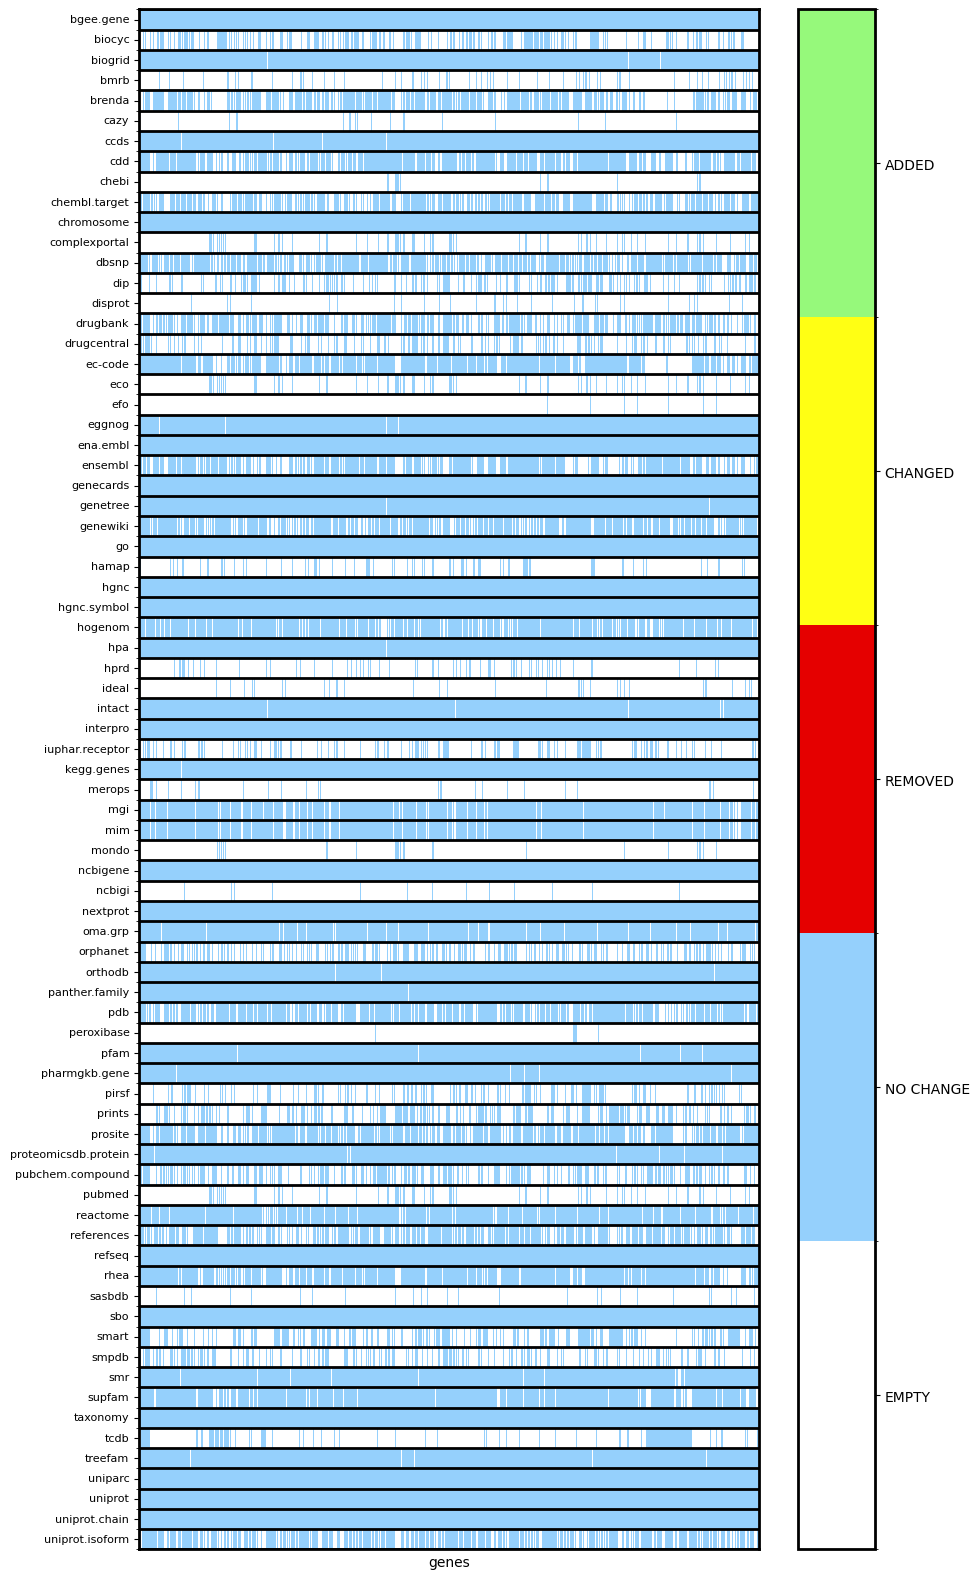

In [8]:
annotation_type = "genes"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))
# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), sorted(list(all_annotation_keys))
).rename({"id": annotation_type}, axis=1)

df_annotations = df_annotations.replace(float("nan"), pd.NA).replace("", pd.NA)
if compare:
    compare_on_index = [annotation_type]
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", sep="\t", index_col=None
        )
        df_previous = df_previous.replace(float("nan"), pd.NA).replace("", pd.NA)
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=compare_on_index)
    df_comparision = compare_tables(
        df_previous.set_index(compare_on_index),
        df_annotations.set_index(compare_on_index),
    )

    fig, ax = plt.subplots(1, 1, figsize=(10, 20))
    ax.yaxis.set_tick_params(labelsize=8)
    ax = visualize_comparison(df_comparision)

if display_nunique:
    for col in df_annotations.columns:
        df = explode_column(df_annotations, name=col, sep=";")
        df = df[col].drop_duplicates()
        print(f"{df.name}: {df.nunique()}")

if overwrite:
    df_annotations.to_csv(
        f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", sep="\t", index=False
    )
else:
    df_annotations.to_csv(
        f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t", index=False
    )
df_annotations